# Data Exploration

Notebook này khai phá dữ liệu từ bộ `processed_data.csv` (World Bank 2000-2024) để nhanh chóng nắm bắt sự thay đổi về tăng trưởng kinh tế, chất lượng sống,... và các yếu tố khác.

## Bước 1 - Chuẩn bị môi trường
Import các thư viện nền tảng và thiết lập style tối giản để biểu đồ nhất quán giữa các bước.


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PATH = Path("../data/worldbank_2000_2024.csv")
DATA_PATH


PosixPath('../data/worldbank_2000_2024.csv')

## Bước 2 - Thông tin tổng quan

In [13]:
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
df.head()

Shape: (5425, 15)

Dtypes:
 Country Name                                                                                      object
Country Code                                                                                      object
Year                                                                                               int64
Population, total                                                                                float64
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)                              float64
Population growth (annual %)                                                                     float64
Life expectancy at birth, total (years)                                                          float64
GDP per capita (current US$)                                                                     float64
GDP growth (annual %)                                                                            float64
People using safely managed

,Country Name,Country Code,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Population living in slums (% of urban population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
0,Aruba,ABW,2000,"90,588.00",NaN,1.03,72.94,"20,681.02",7.62,NaN,91.70,94.49,2.97,0.00,NaN
1,Aruba,ABW,2001,"91,439.00",NaN,0.94,73.04,"20,740.13",4.18,NaN,100.00,94.77,2.97,NaN,NaN
2,Aruba,ABW,2002,"92,074.00",NaN,0.69,73.14,"21,307.25",-0.94,NaN,100.00,95.05,3.22,0.00,NaN
3,Aruba,ABW,2003,"93,128.00",NaN,1.14,73.24,"21,949.49",1.11,NaN,100.00,95.33,3.67,NaN,NaN
4,Aruba,ABW,2004,"95,138.00",NaN,2.14,73.22,"23,700.63",7.29,NaN,100.00,95.62,3.67,0.00,NaN


## Bước 3 - Kiểm tra missing value

In [14]:
# Missing value table
miss = df.isna().sum()
miss_pct = (miss / len(df) * 100).round(2)
missing_table = pd.concat([miss, miss_pct], axis=1)
missing_table.columns = ["n_missing", "pct_missing"]
missing_table = missing_table[missing_table.n_missing > 0].sort_values("pct_missing", ascending=False)
display(missing_table)

,n_missing,pct_missing
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),3591,66.19
Population living in slums (% of urban population),3410,62.86
People using safely managed sanitation services (% of population),2308,42.54
"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",759,13.99
People using at least basic drinking water services (% of population),648,11.94
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),553,10.19
Access to electricity (% of population),290,5.35
GDP growth (annual %),284,5.24
"Life expectancy at birth, total (years)",217,4.00
GDP per capita (current US$),212,3.91


Một số biến thiếu rất nhiều dữ liệu

- Poverty headcount ratio at $3.00 a day... ~ 66% missing

- Population living in slums... ~ 63% missing

- People using safely managed sanitation services... ~ 43% missing


## Bước 4 - Thông tin liên quan về dữ liệu số

In [18]:
# Numeric summary & top categories
num_cols = df.select_dtypes(include=[float, int]).columns.tolist()
print("Numeric cols count:", len(num_cols))
display(df[num_cols].describe().T)

cat_cols = [c for c in df.columns if c not in num_cols]
print("\nSample categorical columns (value counts):")
for c in ["Country Name", "Country Code"] + [c for c in cat_cols if c not in ("Country Name","Country Code")]:
    print(f"\n{c} value counts:")
    display(df[c].value_counts().head())

Numeric cols count: 13


,count,mean,std,min,25%,50%,75%,max
Year,"5,425.00","2,012.00",7.21,"2,000.00","2,006.00","2,012.00","2,018.00","2,024.00"
"Population, total","5,425.00","32,941,398.83","130,594,720.64","9,544.00","728,147.00","5,773,493.00","21,068,405.00","1,450,935,791.00"
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),"1,834.00",9.41,17.13,0.00,0.20,1.40,9.40,94.90
Population growth (annual %),"5,424.00",1.29,1.61,-11.36,0.31,1.18,2.22,21.70
"Life expectancy at birth, total (years)","5,208.00",70.89,8.79,14.66,65.42,72.60,77.47,86.37
GDP per capita (current US$),"5,213.00","16,144.77","24,935.67",109.59,"1,570.10","5,477.04","20,985.01","256,580.52"
GDP growth (annual %),"5,141.00",3.36,5.98,-54.34,1.21,3.51,5.82,91.14
People using safely managed sanitation services (% of population),"3,117.00",54.23,30.87,0.00,26.19,51.81,84.74,100.00
Access to electricity (% of population),"5,135.00",81.52,28.80,0.80,70.15,99.10,100.00,100.00
People using at least basic drinking water services (% of population),"4,777.00",86.33,17.89,18.68,79.88,95.03,99.38,100.00



Sample categorical columns (value counts):

Country Name value counts:


Country Name
Aruba          25
Afghanistan    25
Angola         25
Albania        25
Andorra        25
Name: count, dtype: int64


Country Code value counts:


Country Code
ABW    25
AFG    25
AGO    25
ALB    25
AND    25
Name: count, dtype: int64

**Nhận xét**
- Biến Year: Dataset bao phủ nhiều năm liên tiếp (2000-2024), không bị lệch hẳn về một giai đoạn nào, thuận lợi cho phân tích chuỗi thời gian.

- Population, total: Median ≈ 5.8M nhưng mean ≈ 33M, max ~ 1.45B → một vài nước rất đông dân kéo mean lên cao. → Rất skewed, có những quan sát cực lớn (Trung Quốc, Ấn Độ, …).

- GDP per capita: Median ≈ 5.5k USD, mean ≈ 16k USD, max > 250k USD → chênh lệch cực lớn giữa các quốc gia.
Population growth (annual %): Mean ≈ 1.29%, quartile (0.31–2.22) khá “đẹp”, nhưng min ≈ –11%, max ≈ 21.7%. Có một số năm/country tăng/giảm dân số rất bất thường (chiến tranh, dịch bệnh, sốc dữ liệu).

- GDP growth (annual %): Mean ≈ 3.36%, nhưng min ≈ –54%, max ≈ 91%. Rõ ràng có các năm khủng hoảng/GDP sụt mạnh hoặc bật tăng đột biến, cần chú ý outlier; có thể phải winsorize hoặc clip để tránh làm hỏng mô hình.

- Life expectancy: Median ≈ 72.6 năm, 75% ≈ 77.5, nhưng min chỉ ~14.7, chứng tỏ có một số quan sát thuộc quốc gia rất bất ổn. Nhìn chung tuổi thọ cao, nhưng vẫn có đuôi trái cho các nước nghèo/xung đột.

- Access to electricity, basic drinking water, safely managed sanitation: 
Mean lần lượt ≈ 81.5%, 86.3%, 54.2%. Quartile trên khá cao (nhiều nước >95–99%), nhưng min có thể gần 0–20%. Do đó có thể thấy có xu hướng hai cực: nhiều nước gần như bao phủ 100%, nhưng cũng có nhóm nước hạ tầng rất yếu

- CO₂ emissions per capita: Median ≈ 2.28 tấn/người, mean ≈ 4.88, max > 200, chứng tỏ một số nước phát thải cực lớn kéo mean lên.

- Population living in slums, Poverty headcount: Mean khoảng 28% và 9.4%, nhưng std lớn, min 0, max gần 100, có sự chênh lệch rất mạnh giữa các nước. Đây là các biến nhạy cảm về missing + outlier.

        Dataset rất không đồng nhất giữa các quốc gia: nhiều biến kinh tế/xã hội lệch phải, có outlier mạnh.

## Bước 5: Phát hiện nhiễu cơ bản và outlier

### 5.1. Phát hiện bằng Box plot:
- Phát hiện Outlier (Giá trị ngoại lai): Các điểm nằm ngoài 'râu' (whiskers) của hộp giúp dễ dàng nhận diện các giá trị bất thường, cực đoan trong dữ liệu.
- So sánh phân bố giữa các nhóm: Khi vẽ boxplot cho từng nhóm, giúp so sánh nhanh vị trí trung tâm (median), độ phân tán (tứ phân vị) và sự lệch của dữ liệu giữa các nhóm.
- Đánh giá nhanh phân bố: Cung cấp cái nhìn tổng quan về median, các tứ phân vị (Q1, Q3), phạm vi và sự đối xứng của một biến số liên tục.

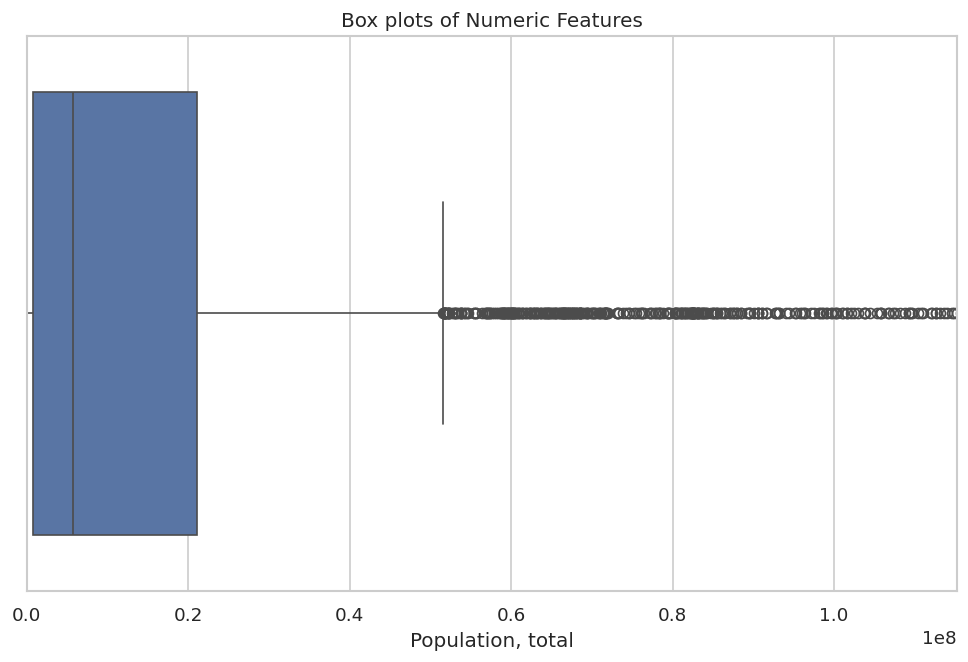

In [ ]:
# vì population có giá trị lớn nên cần khảo sát riêng
plt.figure(figsize=(10, 6))
sns.boxplot(data=df["Population, total"], orient="h")
plt.title("Box plots of Numeric Features")
plt.xlim(0, df["Population, total"].quantile(0.95))
plt.show()

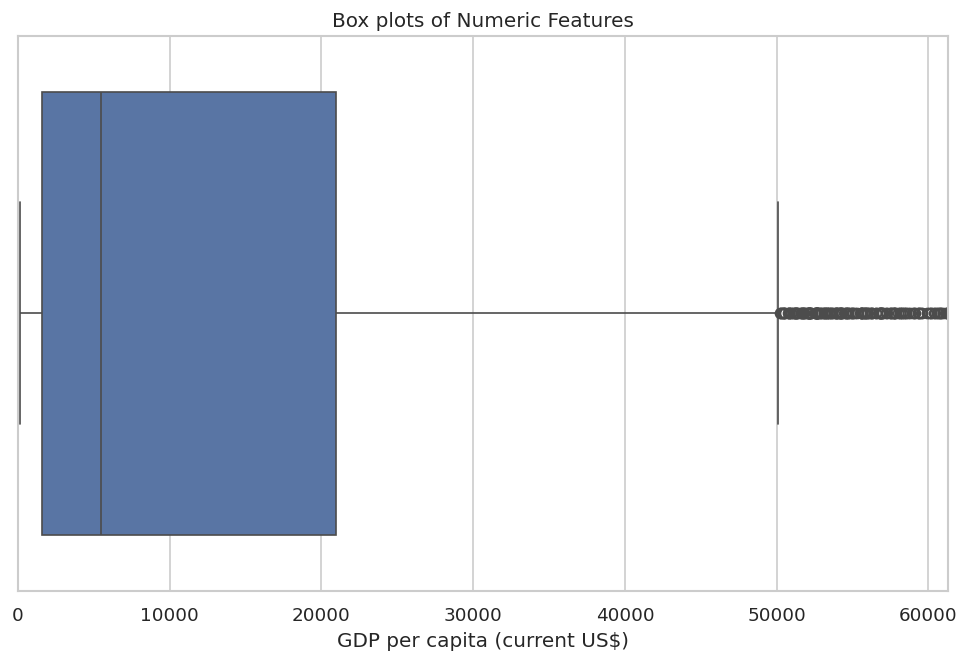

In [27]:
# Biến GDP per capita (current US$) cũng có giá trị lớn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df["GDP per capita (current US$)"], orient="h")
plt.title("Box plots of Numeric Features")
plt.xlim(0, df["GDP per capita (current US$)"].quantile(0.95))
plt.show()

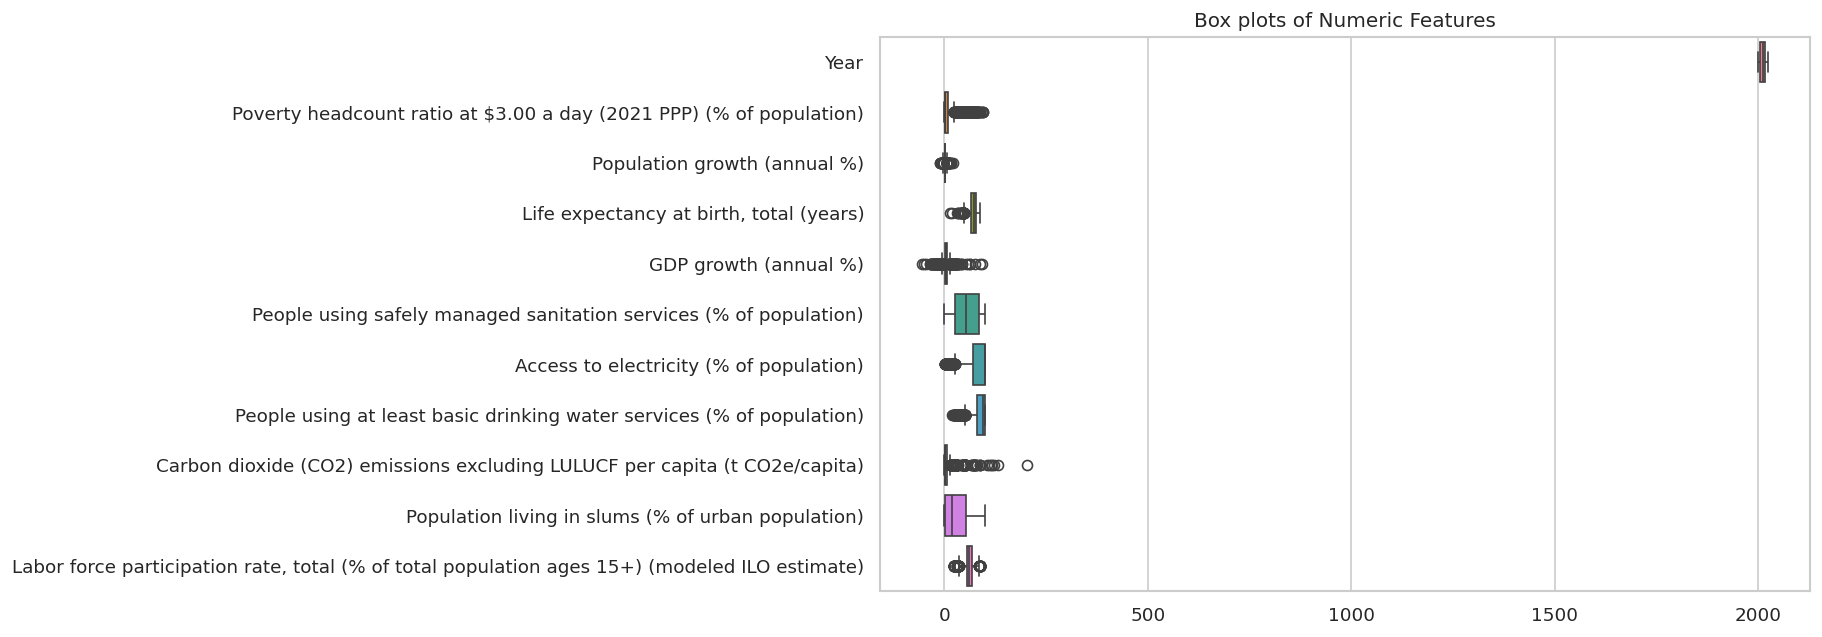

In [26]:
# vẽ boxplot cho các biến số còn lại
num_cols_clone = [c for c in num_cols if c != "Population, total" and c != "GDP per capita (current US$)"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols_clone], orient="h")
plt.title("Box plots of Numeric Features")  
plt.show()

### 5.2. Phát hiện nhiễu bằng IQR

In [30]:
def apply_iqr_outlier_detection(df, columns):
    """
    Applies the IQR rule to detect and replace outliers with NaN in specified columns.
    """
    df_copy = df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_copy[col]):
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            mask = (df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)
            n_out = int(mask.sum())
            n_total = int(df_copy[col].notna().sum())
            print(f"Outliers detected in column '{col}': {n_out}/{n_total}")
            # df_copy.loc[mask, col] = np.nan

apply_iqr_outlier_detection(df, num_cols)

Outliers detected in column 'Year': 0/5425
Outliers detected in column 'Population, total': 623/5425
Outliers detected in column 'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)': 240/1834
Outliers detected in column 'Population growth (annual %)': 131/5424
Outliers detected in column 'Life expectancy at birth, total (years)': 54/5208
Outliers detected in column 'GDP per capita (current US$)': 428/5213
Outliers detected in column 'GDP growth (annual %)': 344/5141
Outliers detected in column 'People using safely managed sanitation services (% of population)': 0/3117
Outliers detected in column 'Access to electricity (% of population)': 454/5135
Outliers detected in column 'People using at least basic drinking water services (% of population)': 335/4777
Outliers detected in column 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)': 332/4872
Outliers detected in column 'Population living in slums (% of urban population)': 0/2015
Outliers detec